## Capillary pressure
Imagine a very thin glass tube filled with water. If the tube is thin enough, water likes to stay in the tube. You have to blow in the tube to push it out. In other words, to replace water that wets the glass with air, we need to push air into the tube. The amount of pushing that you need for air to go through is called capillary pressure. Its value, which is defined as $$p_c=p_{air}-p_{w},$$ is related to the water-air surface tension, contact angle, and tube diameter with the following relation: $$p_c=\frac{\gamma_{w-air}\cos(\theta)}{r}.$$  
In Petroleum Engineering, capillary pressure has the same definition: $$p_c=p_{nw}-p_w,$$ where subscripts *nw* and *w* denote 'non-wetting' and 'wetting' phases respectively. However, a porous medium is made of many tubes with different sizes. Therefore, when we want to blow water out of it, the amount of required 'pushing' depends on the number of tubes that are already filled with water (or the wetting phase). In other words, the capillary pressure depends on the 'wetting-phase saturation'. If we assume the average tube radius can be defined by $\sqrt{k/\phi}$, with *k* permeability and $\phi$ porosity, we can write the capillary pressure in a porous medium as $$p_c=J(S_w)\frac{\gamma_{w-nw}\cos(\theta)}{\sqrt(k/\phi)}$$
Clearly, someone has done it years ago, and therefore the function *J* is conveniently called the Leverett J-function.  
## The J-function
Let's think about the porous medium as a bundle of water-wet tubes with different diameters. First the tubes are filled with water, i.e., the water saturation is one. When we start blowing air into the tubes to push water out, at the beginning the minimum resistance is in the tube with the maximum diameter (see the definitions in the previous section). The amount of pressure that is required to push water out of the largest tube is called the entry capillary pressure. Then one by one we push water out of the thinner tubes. I always wanted to try this for myself. Why not here?
## Capillary pressure for a bundle of tubes
The following code plots the capillary pressure versus water saturation for the drainage and imbibition processes. I use some assumptions for the estimation of dynamic contact angle, to take into account the hysteresis.

In [1]:
using PyPlot

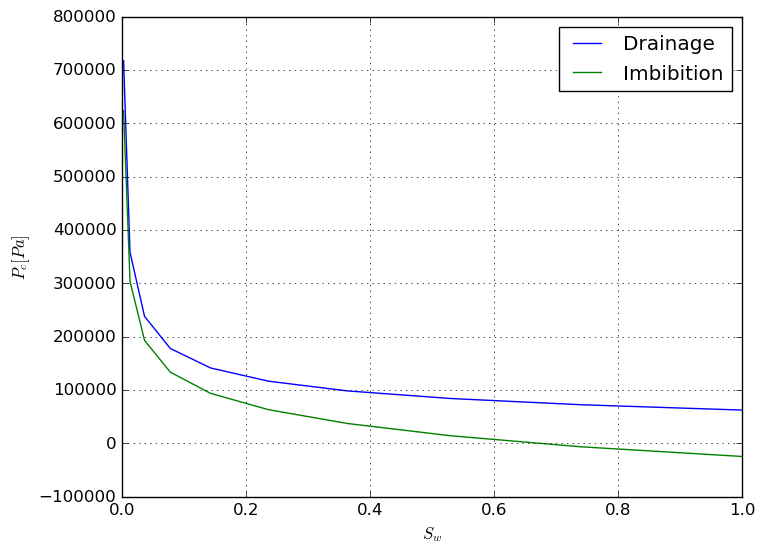

In [3]:
r_min=1e-7 # [m]
r_max=1e-6 # [m]
r=collect(linspace(r_min, r_max, 10))
gama_gw=0.072 # [N/m]
teta=deg2rad(30.0)
teta_min=deg2rad(5.0)
teta_max=deg2rad(110.0)
# advance (imbibe)
# r_max: teta
# r_min: teta_max
teta_imb=(teta_max-teta)/(r_max^2-r_min^2)*(r.^2-r_min^2)+teta
# recede (drain)
# r_max: teta
# r_min: teta_min
teta_drain=(teta-teta_min)/(r_max^2-r_min^2)*(r.^2-r_min^2)+teta_min
v=π*r.^2
v_tot=sum(v)
s=cumsum(v)/v_tot
p_drain=gama_gw*cos(teta_drain)./r
p_imb=gama_gw*cos(teta_imb)./r
plot(s,p_drain, s, p_imb)
xlabel(L"S_w")
ylabel(L"P_c [Pa]")
grid()
legend(["Drainage", "Imbibition"]);